In [32]:
from coniii import *
from process_input import fish_input_process


In [33]:
TIME = 3600

In [34]:
file = 'samples.csv'
import pandas as pd
#read in data
data = pd.read_csv(file, header=None)

print(data.shape)


samples = fish_input_process(file,time=TIME)

print(samples.shape)
FISH_N = samples.shape[0]# neuro
FISH_N_PAIRS = int(FISH_N * (FISH_N - 1) / 2)

(8, 500)
(8, 500)


In [1]:
samples.shape[0]

NameError: name 'samples' is not defined

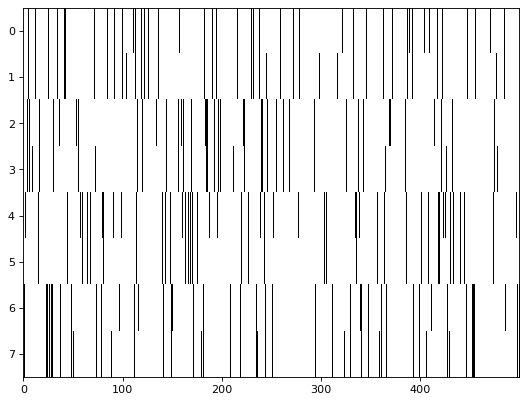

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(samples, aspect="auto", cmap="gray_r", interpolation="none")

In [36]:
calc_e, calc_observables, mchApproximation = define_ising_helper_functions()
print(calc_e)
print(calc_observables)
print(mchApproximation)

CPUDispatcher(<function define_ising_helper_functions.<locals>.calc_e at 0x157b7e4d0>)
CPUDispatcher(<function define_ising_helper_functions.<locals>.calc_observables at 0x157b7e3b0>)
<function define_ising_helper_functions.<locals>.mch_approximation at 0x157b7e5f0>


In [37]:
solver = ClusterExpansion(samples.T)

multipliers, ent, clusters, deltaSdict, deltaJdict= solver.solve(threshold=0.1, full_output=True)

/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii/solvers.py:96: UserWarning: Assuming that calc_observables should be for Ising model.
  if iprint: warn("Assuming that calc_observables should be for Ising model.")
/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/coniii/samplers.py:1187: UserWarning: Boost C++ implementation not available. Defaulting to slower sampling methods.
  warn("Boost C++ implementation not available. Defaulting to slower sampling methods.")


adaptiveClusterExpansion: Clusters of size 2


/opt/homebrew/anaconda3/envs/test/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


adaptiveClusterExpansion: Clusters of size 3


In [49]:
J = multipliers[FISH_N:]

# 创建一个 N*N 的零矩阵
matrix = np.zeros((FISH_N, FISH_N))

# # 使用数组的前N个元素填充对角线
# matrix[np.diag_indices(FISH_N)] = multipliers[:FISH_N]

# 使用数组的后N+2(N*N-1)个元素填充上半矩阵
index = FISH_N
for i in range(FISH_N):
    for j in range(i+1, FISH_N):
        matrix[i, j] = multipliers[index]
        index += 1
# 获取上半矩阵（包含对角线）
upper_matrix = np.triu(matrix)

# 转置上半矩阵并将其添加到下半部分
lower_matrix = np.transpose(upper_matrix)
lower_matrix = np.tril(lower_matrix, -1)

# 将上半矩阵和转置的下半矩阵相加得到完整的矩阵
final_matrix = upper_matrix + lower_matrix

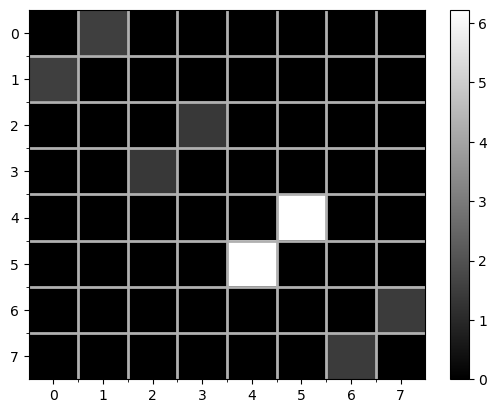

In [58]:
#plot imshow and add lines
plt.imshow(final_matrix, aspect="auto", cmap="gray")
ax = plt.gca() # 获取当前的坐标轴
ax.set_xticks([x-0.5 for x in range(1, final_matrix.shape[1])], minor=True) # 设置x轴的小刻度
ax.set_yticks([y-0.5 for y in range(1, final_matrix.shape[0])], minor=True) # 设置y轴的小刻度
plt.grid(which='minor', linestyle='-', linewidth=2)
plt.colorbar()